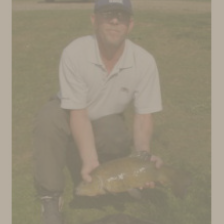

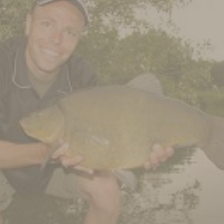

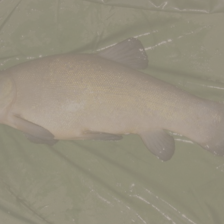

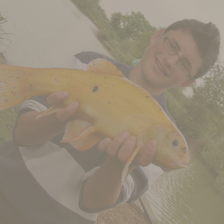

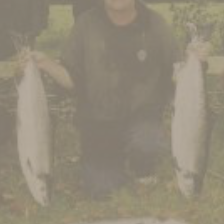

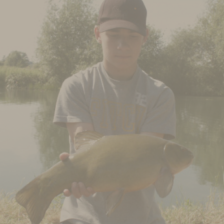

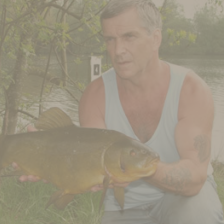

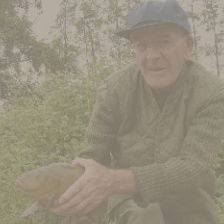

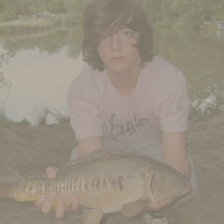

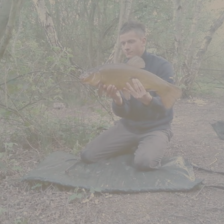

In [1]:
import numpy as np
from PIL import Image

file_name = 'denormed_golden.npy'
input_np = np.load(file_name)

for i in range(input_np.shape[0]):
#     print(input_np.shape)
#     print(input_np[1])

    img = np.array(input_np[i]*255.0).transpose(1, 2, 0).astype(np.uint8)
    display(Image.fromarray(img))

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from collections import OrderedDict

resume = 'pretrained_imagenet_dont_push/binput_prerprelu_pg.pt'
loaded_dict = torch.load(resume)

for k, v in loaded_dict.items():
    print(k)

module.img_mean
module.img_std
module.model.0.0.weight
module.model.0.1.weight
module.model.0.1.bias
module.model.0.1.running_mean
module.model.0.1.running_var
module.model.0.1.num_batches_tracked
module.model.1.conv3x3.0.weight
module.model.1.conv3x3.0.threshold
module.model.1.conv3x3.1.weight
module.model.1.conv3x3.1.bias
module.model.1.conv3x3.1.running_mean
module.model.1.conv3x3.1.running_var
module.model.1.conv3x3.1.num_batches_tracked
module.model.1.pointwise.0.weight
module.model.1.pointwise.0.threshold
module.model.1.pointwise.1.weight
module.model.1.pointwise.1.bias
module.model.1.pointwise.1.running_mean
module.model.1.pointwise.1.running_var
module.model.1.pointwise.1.num_batches_tracked
module.model.1.rprelu1.shift_x.bias
module.model.1.rprelu1.shift_y.bias
module.model.1.rprelu1.prelu.weight
module.model.1.rprelu2.shift_x.bias
module.model.1.rprelu2.shift_y.bias
module.model.1.rprelu2.prelu.weight
module.model.1.shiftbn1.weight
module.model.1.shiftbn1.bias
module.model.1.

In [3]:
file_name = "encoder_out_golden.npy"
input_np = np.load(file_name).astype(np.uint8)
print(input_np.shape)
print(input_np[0])

(10, 96, 224, 224)
[[[  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  ...
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]]

 [[  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  ...
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]]

 [[  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  ...
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]
  [  1   1   1 ...   1   1   1]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 25

In [4]:
new_np = np.zeros((96*10, 224, 224), dtype = np.uint8)
for b in range(10):
    for c in range(96):
        for row in range(224):
            for col in range(224):
                if input_np[b][c][row][col] == 1:
                    new_np[b*96 + c][row][col] = 1

In [5]:
with open("conv1_input.bin", "wb") as f:
    f.write(new_np.flatten())

s = new_np.shape
with open("conv1_input.bin", "rb") as f:
    data = list(f.read())
data_recon = np.array(data).reshape(s)
# print(data_recon)
if data_recon.all() == new_np.all():
    print('GOOD')

GOOD


In [6]:
from collections import OrderedDict
new_dict = OrderedDict()
for k, v in loaded_dict.items():
    if 'tracked' not in k:
#         print(k)
#         print(v.shape)
        new_k = k.split('.')[1:]
        if new_k[0] == 'model':
            new_k[0] = 'layer'
        new_k = '_'.join(new_k)
        if 'conv3x3_0_weight' in new_k or 'pointwise_0_weight' in new_k or 'fc_weight' in new_k or '0_0_weight' in new_k:
            new_dict[new_k] = v.cpu().numpy()
        else: 
            new_dict[new_k] = v.cpu().numpy().flatten()
        

for k, v in new_dict.items():
    print(k)
    print(v.shape)

img_mean
(3,)
img_std
(3,)
layer_0_0_weight
(32, 96, 3, 3)
layer_0_1_weight
(32,)
layer_0_1_bias
(32,)
layer_0_1_running_mean
(32,)
layer_0_1_running_var
(32,)
layer_1_conv3x3_0_weight
(32, 32, 3, 3)
layer_1_conv3x3_0_threshold
(32,)
layer_1_conv3x3_1_weight
(32,)
layer_1_conv3x3_1_bias
(32,)
layer_1_conv3x3_1_running_mean
(32,)
layer_1_conv3x3_1_running_var
(32,)
layer_1_pointwise_0_weight
(64, 32, 1, 1)
layer_1_pointwise_0_threshold
(64,)
layer_1_pointwise_1_weight
(64,)
layer_1_pointwise_1_bias
(64,)
layer_1_pointwise_1_running_mean
(64,)
layer_1_pointwise_1_running_var
(64,)
layer_1_rprelu1_shift_x_bias
(32,)
layer_1_rprelu1_shift_y_bias
(32,)
layer_1_rprelu1_prelu_weight
(32,)
layer_1_rprelu2_shift_x_bias
(64,)
layer_1_rprelu2_shift_y_bias
(64,)
layer_1_rprelu2_prelu_weight
(64,)
layer_1_shiftbn1_weight
(32,)
layer_1_shiftbn1_bias
(32,)
layer_1_shiftbn1_running_mean
(32,)
layer_1_shiftbn1_running_var
(32,)
layer_1_shiftbn2_weight
(64,)
layer_1_shiftbn2_bias
(64,)
layer_1_shiftbn2_

In [7]:
def fuse_bn(weight, bias, mean, var):
    fused_weight = weight/np.sqrt(var - 1e-5)
    fused_bias = bias - mean*weight/np.sqrt(var - 1e-5)
    return fused_weight, fused_bias

bn1_weight = new_dict['layer_0_1_weight']
bn1_bias = new_dict['layer_0_1_bias']
bn1_running_mean = new_dict['layer_0_1_running_mean']
bn1_running_var = new_dict['layer_0_1_running_var']

# print(new_dict['l_0_1_weight'])
# print(new_dict['l_0_1_bias'])
# print(new_dict['l_0_1_running_mean'])
# print(new_dict['l_0_1_running_var'])

bn1_fused_weight = bn1_weight/np.sqrt(bn1_running_var - 1e-5)
bn1_fused_bias = bn1_bias - bn1_running_mean*bn1_weight/np.sqrt(bn1_running_var - 1e-5)

new_dict['layer_0_1_weight'] = bn1_fused_weight
new_dict['layer_0_1_bias'] = bn1_fused_bias
# print(new_dict['l_0_1_weight'])
# print(new_dict['l_0_1_bias'])
del new_dict['layer_0_1_running_mean']
del new_dict['layer_0_1_running_var']

for i in range(13):
    l_ind = i + 1
    weight_name = 'layer_%d_conv3x3_1_weight'%(l_ind)
    bias_name = 'layer_%d_conv3x3_1_bias'%(l_ind)
    mean_name = 'layer_%d_conv3x3_1_running_mean'%(l_ind)
    std_name = 'layer_%d_conv3x3_1_running_var'%(l_ind)
    weight = new_dict[weight_name]
    bias = new_dict[bias_name]
    running_mean = new_dict[mean_name]
    running_var = new_dict[std_name]

    fused_weight = weight/np.sqrt(running_var - 1e-5)
    fused_bias = bias - running_mean*weight/np.sqrt(running_var - 1e-5)

    new_dict[weight_name] = fused_weight
    new_dict[bias_name] = fused_bias
    del new_dict[mean_name]
    del new_dict[std_name]
    
    weight_name = 'layer_%d_pointwise_1_weight'%(l_ind)
    bias_name = 'layer_%d_pointwise_1_bias'%(l_ind)
    mean_name = 'layer_%d_pointwise_1_running_mean'%(l_ind)
    std_name = 'layer_%d_pointwise_1_running_var'%(l_ind)
    weight = new_dict[weight_name]
    bias = new_dict[bias_name]
    running_mean = new_dict[mean_name]
    running_var = new_dict[std_name]

    fused_weight = weight/np.sqrt(running_var - 1e-5)
    fused_bias = bias - running_mean*weight/np.sqrt(running_var - 1e-5)

    new_dict[weight_name] = fused_weight
    new_dict[bias_name] = fused_bias
    del new_dict[mean_name]
    del new_dict[std_name]
    
    for j in range(2):
        l_ind = i + 1
        bn_ind = j + 1
        weight_name = 'layer_%d_shiftbn%d_weight'%(l_ind, bn_ind)
        bias_name = 'layer_%d_shiftbn%d_bias'%(l_ind, bn_ind)
        mean_name = 'layer_%d_shiftbn%d_running_mean'%(l_ind, bn_ind)
        std_name = 'layer_%d_shiftbn%d_running_var'%(l_ind, bn_ind)
#         print(weight_name)
#         print(bias_name)
#         print(mean_name)
#         print(std_name)
        weight = new_dict[weight_name]
        bias = new_dict[bias_name]
        running_mean = new_dict[mean_name]
        running_var = new_dict[std_name]

        fused_weight = weight/np.sqrt(running_var - 1e-5)
        fused_bias = bias - running_mean*weight/np.sqrt(running_var - 1e-5)

        new_dict[weight_name] = fused_weight
        new_dict[bias_name] = fused_bias
        del new_dict[mean_name]
        del new_dict[std_name]
        
for k, v in new_dict.items():
    print(k)
    print(v.shape)

img_mean
(3,)
img_std
(3,)
layer_0_0_weight
(32, 96, 3, 3)
layer_0_1_weight
(32,)
layer_0_1_bias
(32,)
layer_1_conv3x3_0_weight
(32, 32, 3, 3)
layer_1_conv3x3_0_threshold
(32,)
layer_1_conv3x3_1_weight
(32,)
layer_1_conv3x3_1_bias
(32,)
layer_1_pointwise_0_weight
(64, 32, 1, 1)
layer_1_pointwise_0_threshold
(64,)
layer_1_pointwise_1_weight
(64,)
layer_1_pointwise_1_bias
(64,)
layer_1_rprelu1_shift_x_bias
(32,)
layer_1_rprelu1_shift_y_bias
(32,)
layer_1_rprelu1_prelu_weight
(32,)
layer_1_rprelu2_shift_x_bias
(64,)
layer_1_rprelu2_shift_y_bias
(64,)
layer_1_rprelu2_prelu_weight
(64,)
layer_1_shiftbn1_weight
(32,)
layer_1_shiftbn1_bias
(32,)
layer_1_shiftbn2_weight
(64,)
layer_1_shiftbn2_bias
(64,)
layer_2_conv3x3_0_weight
(64, 64, 3, 3)
layer_2_conv3x3_0_threshold
(64,)
layer_2_conv3x3_1_weight
(64,)
layer_2_conv3x3_1_bias
(64,)
layer_2_pointwise_0_weight
(128, 64, 1, 1)
layer_2_pointwise_0_threshold
(128,)
layer_2_pointwise_1_weight
(128,)
layer_2_pointwise_1_bias
(128,)
layer_2_rprelu1

In [8]:
np_cat = np.ndarray((0,))
np1 = new_dict['layer_0_0_weight']
np2 = new_dict['layer_1_conv3x3_0_weight']
np1 = np1.flatten()
np2 = np2.flatten()
print(np1.shape)
print(np2.shape)
np_cat = np.concatenate((np_cat, np1),axis=0)
print(np_cat.shape)
np_cat = np.concatenate((np_cat, np2),axis=0)
print(np_cat.shape)

ptr_start = 27648
ptr_end = 27648 + 9216
s2 = new_dict['layer_1_conv3x3_0_weight'].shape
to_recon = np_cat[ptr_start:ptr_end]

to_recon = to_recon.reshape(s2)
print(to_recon.all() == new_dict['layer_1_conv3x3_0_weight'].all())

(27648,)
(9216,)
(27648,)
(36864,)
True


In [9]:
conv3x3_weights = np.ndarray((0,), dtype=np.float32)
conv1x1_weights = np.ndarray((0,), dtype=np.float32)
other_weights = np.ndarray((0,), dtype=np.float32)

conv3x3_ch = 0
conv1x1_ch = 0
other_ch = 0
for k, v in new_dict.items():
    if 'conv3x3_0_weight' in k or '0_0_weight' in k:
        print(v.shape)
        conv3x3_ch += v.shape[0]*v.shape[1]
        conv3x3_weights = np.concatenate((conv3x3_weights, v.flatten()),axis=0)
    elif 'pointwise_0_weight' in k:
        conv1x1_ch += v.shape[0]*v.shape[1]
        conv1x1_weights = np.concatenate((conv1x1_weights, v.flatten()),axis=0)
    else:
        other_ch += v.shape[0]
        other_weights = np.concatenate((other_weights, v.flatten()),axis=0)
print(conv3x3_ch)
print(conv1x1_ch)
print(other_ch)

(32, 96, 3, 3)
(32, 32, 3, 3)
(64, 64, 3, 3)
(128, 128, 3, 3)
(128, 128, 3, 3)
(256, 256, 3, 3)
(256, 256, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(512, 512, 3, 3)
(1024, 1024, 3, 3)
2793472
3139584
89366


In [10]:
s = conv3x3_weights.dtype
print(s)

with open("conv3x3_weights.bin", "wb") as f:
    f.write(conv3x3_weights)
    
with open("conv1x1_weights.bin", "wb") as f:
    f.write(conv1x1_weights.flatten())
    
with open("other_weights.bin", "wb") as f:
    f.write(other_weights.flatten())


float32


In [20]:
ch_out, ch_in = 32, 96
ptr = 0
recon = np.ndarray((ch_out, ch_in, 3, 3), dtype=np.float32)
for co in range(ch_out):
    for ci in range(ch_in):
        for row in range(3):
            for col in range(3):
                index = co*ch_in*3*3 + ci*3*3 + row*3 + col
                recon[co][ci][row][col] = conv3x3_weights[ptr + index]

In [27]:
test = new_dict['layer_0_0_weight']
coo, cii = 17, 19
print(test[coo][cii])
print()
print(recon[coo][cii])

[[-1.3002019e+00 -1.3017271e+00 -1.3010699e+00]
 [ 5.1333630e-01  4.1743897e-05 -4.0310398e-01]
 [ 1.3003914e+00  1.3009348e+00  1.3003546e+00]]

[[-1.3002019e+00 -1.3017271e+00 -1.3010699e+00]
 [ 5.1333630e-01  4.1743897e-05 -4.0310398e-01]
 [ 1.3003914e+00  1.3009348e+00  1.3003546e+00]]


In [31]:
test = new_dict['layer_0_1_weight']
print(test)
test = new_dict['layer_0_1_bias']
print(test)

print(other_weights[0:32])

[0.0276638  0.05215086 0.01383643 0.01583145 0.01679028 0.04585718
 0.02215995 0.04912253 0.04994803 0.05420921 0.04704151 0.03174365
 0.05266959 0.056039   0.03427726 0.01432061 0.02919087 0.04095517
 0.01201091 0.02340754 0.02485134 0.02983307 0.02989089 0.03288265
 0.04372211 0.03022272 0.00553897 0.04719184 0.04852183 0.02796602
 0.04174229 0.0523206 ]
[-0.09466667 -0.0339788   0.13287318 -1.0179528   0.02474334 -0.18238726
  0.9379675   0.24602789  0.37345672 -0.35387424  0.15910548  0.24928069
 -0.21328115  0.04092775  0.39106637 -0.38002074  0.40698808  0.13598403
  0.1845651   0.5945606  -0.05420658  0.20496345  0.58210915  0.23124957
 -0.26217064 -0.06176091  0.00994611 -0.49042875  0.01894779  0.16941354
  0.05730496 -0.34740096]
[0.485      0.456      0.406      0.229      0.224      0.225
 0.0276638  0.05215086 0.01383643 0.01583145 0.01679028 0.04585718
 0.02215995 0.04912253 0.04994803 0.05420921 0.04704151 0.03174365
 0.05266959 0.056039   0.03427726 0.01432061 0.0291908

In [30]:
test = new_dict['layer_1_pointwise_0_weight']
print(test[coo])

[[[ 1.09715969e-03]]

 [[-1.30095625e+00]]

 [[-4.36200947e-01]]

 [[-6.75690293e-01]]

 [[ 1.30088294e+00]]

 [[-2.11238526e-04]]

 [[-1.90126884e-05]]

 [[ 1.30046856e+00]]

 [[-1.30203867e+00]]

 [[-1.30053747e+00]]

 [[ 1.30143392e+00]]

 [[-9.55592513e-01]]

 [[ 9.37897027e-01]]

 [[-4.14748900e-02]]

 [[ 1.30157030e+00]]

 [[ 6.57355338e-02]]

 [[-6.54858649e-02]]

 [[-1.30302525e+00]]

 [[ 4.09105778e-01]]

 [[ 1.02703496e-04]]

 [[-8.33781838e-01]]

 [[-1.30134690e+00]]

 [[-1.30196667e+00]]

 [[ 1.30224597e+00]]

 [[-1.17563047e-01]]

 [[ 2.33403145e-04]]

 [[-9.77671027e-01]]

 [[ 1.18127922e-07]]

 [[ 1.30077040e+00]]

 [[-3.49806469e-05]]

 [[ 2.64668744e-02]]

 [[ 2.40543827e-01]]]
